In [324]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [325]:
import numpy as np
import pandas as pd

In [326]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [327]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [328]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [329]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables

base.prepare(engine, reflect=True)

In [330]:
# We can view all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [331]:
# Save references to each table
measurement = Base.classes.measurement
station = base.classes.station

In [332]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [333]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [334]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [335]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp). \
            filter(measurement.date >= '2016-08-24', measurement.date 
                   <='2017-08-23').\
            order_by(measurement.date).all()
prcp_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [336]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data_df = pd.DataFrame(data=precip_data)
prcp_data_df.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [364]:
# Sort the dataframe by date
prcp_data_df = prcp_data_df.set_index("date")
prcp_data_df.head(10)

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


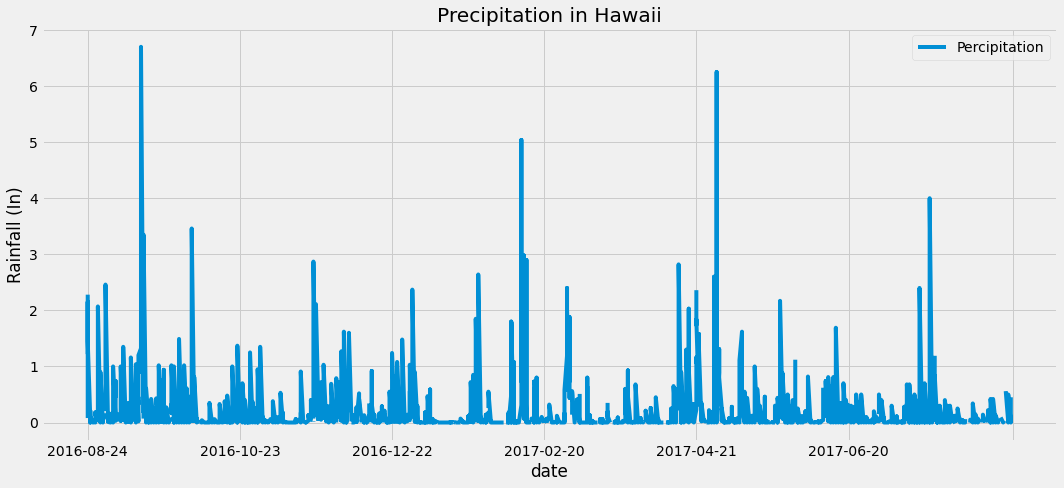

In [369]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_data_df=pd.DataFrame(data=prcp_data)
plt.figure(figsize = (15,7))
plt.plot(prcp_data_df['date'], prcp_data_df['prcp'])
plt.title("Precipitation in Hawaii")
plt.xlabel('date')
plt.xticks([0,60,120,180,240,300,365])
plt.ylabel('Rainfall (In)')
plt.legend(['Percipitation'])
plt.tight_layout()
plt.show()

In [370]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [371]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.station)).all()


[(9)]

In [372]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [375]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
tobs = [measurement.station,
       func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]

most_active_station=(session.query(*tobs).filter(measurement.station=='USC00519281').all())
most_active_station_df=pd.DataFrame(most_active_station, 
                                    columns= ['Station', 'Max Temp', 'Min Temp', 'Avg Temp'])
most_active_station_df

,Station,Max Temp,Min Temp,Avg Temp
0,USC00519281,54.0,85.0,71.663781


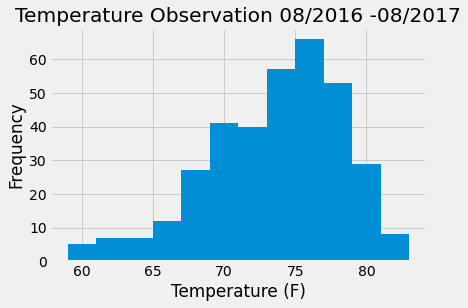

In [380]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(measurement.tobs).\
                    filter(measurement.station=='USC00519281').\
                    filter(measurement.date>= one_year_ago).\
                    order_by(measurement.date.desc()).all()
x =[x[0] for x in histogram]


plt.title('Temperature Observation 08/2016 -08/2017')
plt.hist(x, bins=12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')


plt.show()

## Bonus Challenge Assignment

In [381]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [398]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps= calc_temps('2011-02-28', '2011-03-05')
temps

[(61.0, 69.75510204081633, 75.0)]

(60.0, 76.92857142857143)

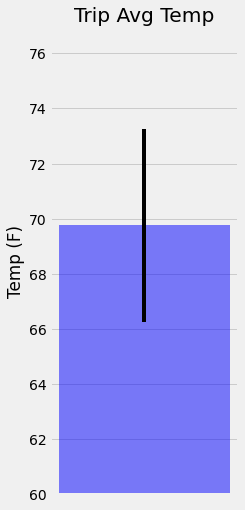

In [411]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lower = temps[0][1] - temps[0][0]
upper = temps[0][2] - temps[0][1]
plt.figure(figsize = (3,8))
plt.bar(0, temps[0][1], yerr=[upper-lower], color='blue', alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)
